# GA Visualization

In [1]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

run_stats = pd.read_csv('ga_run_stats.iteration.csv')
dup_stats = pd.read_csv('ga_run_stats.duplicates.csv')

sector_list = run_stats['SectorId'].unique()
sector_list.sort()

title_list1 = []
title_list2 = []
for sector in sector_list:
    title_list1.append('{} Fitness'.format(sector))
    title_list2.append('{} Performance'.format(sector))

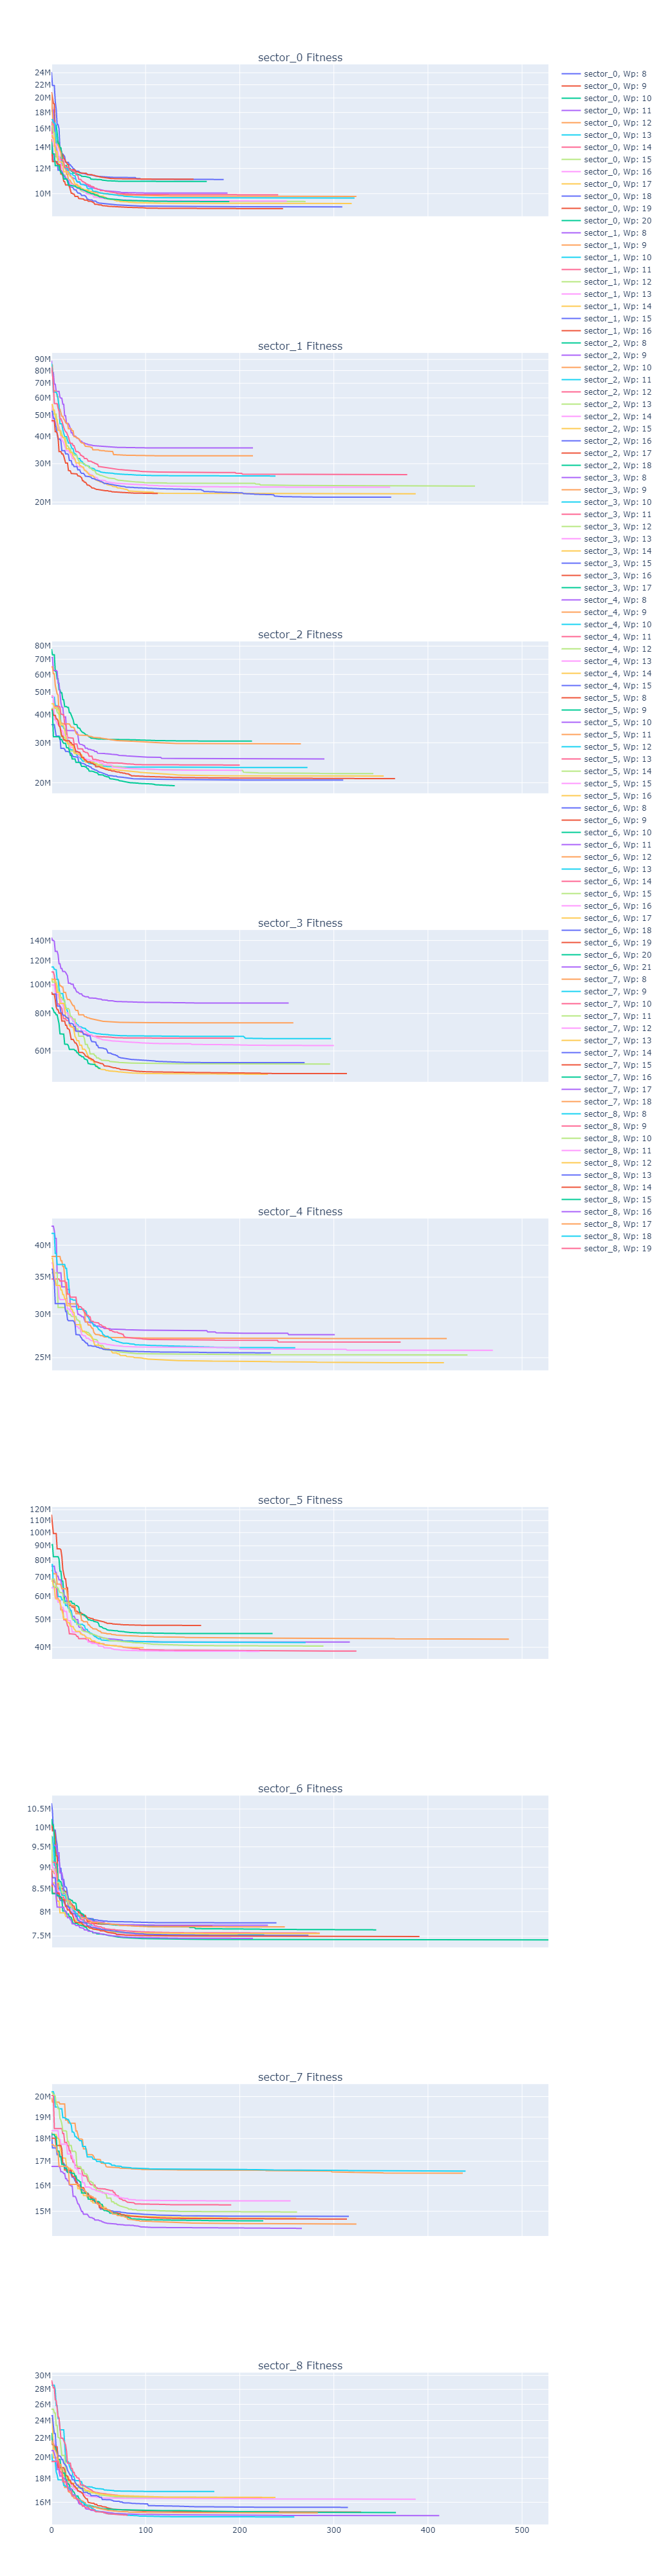

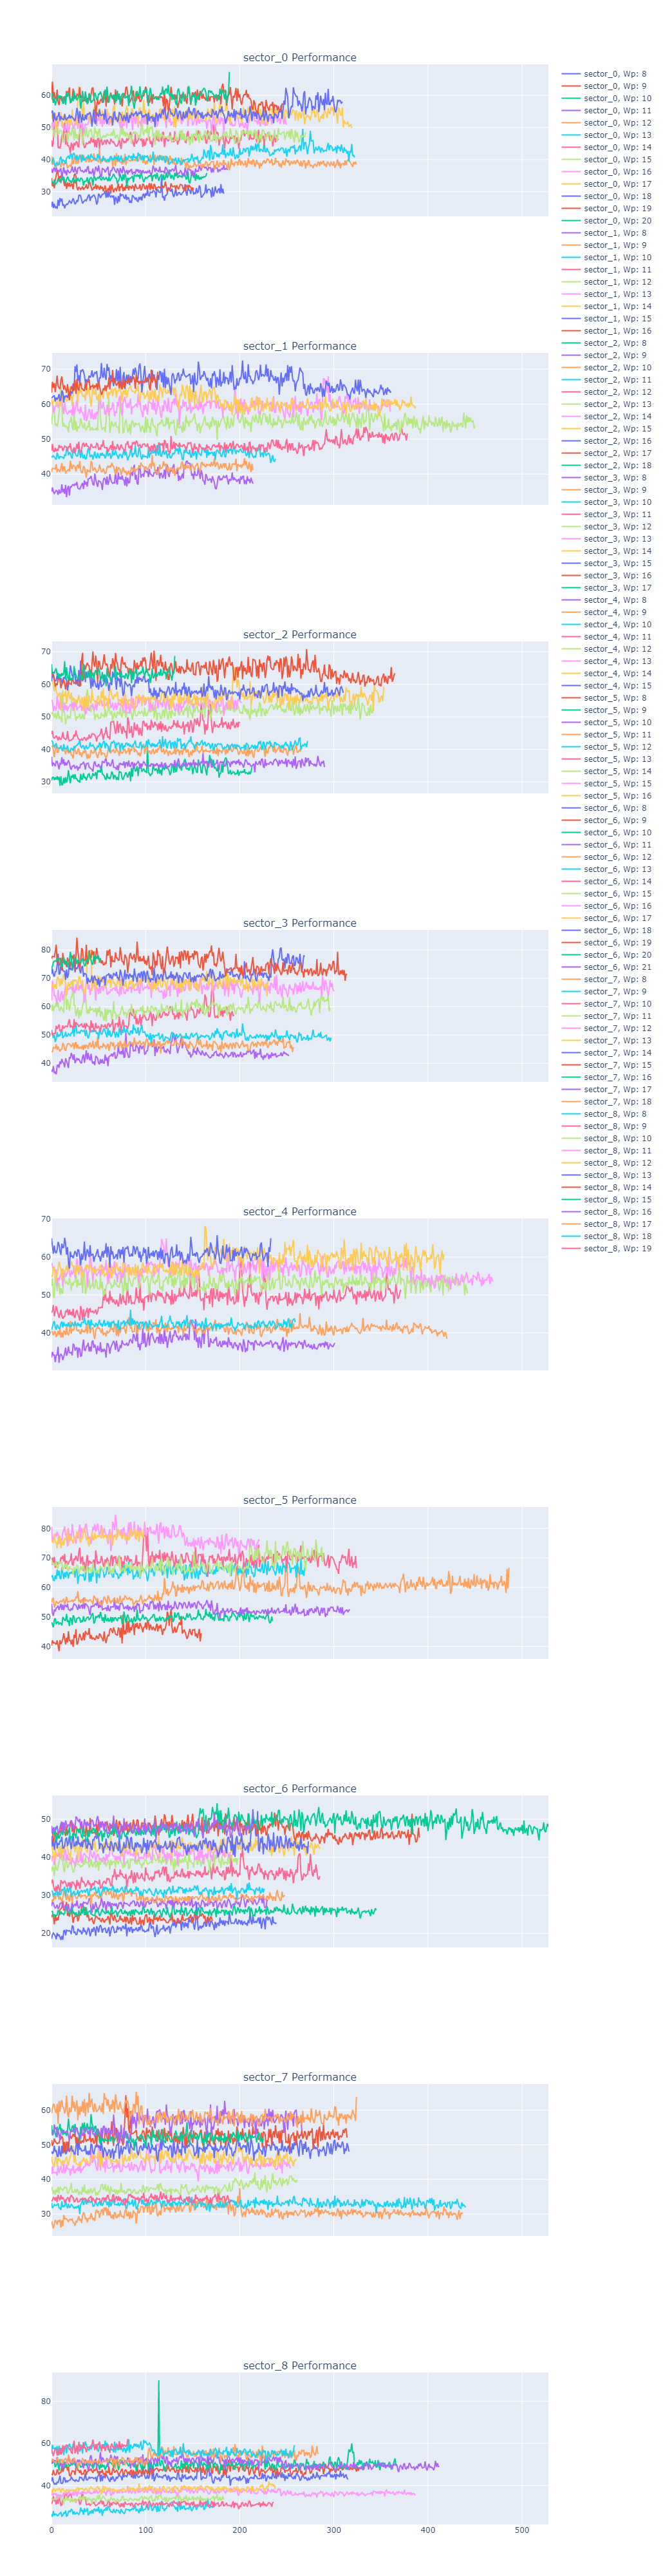

In [2]:
fig1 = make_subplots( rows=len(sector_list),
                      cols=1,
                      shared_xaxes=True,
                      subplot_titles=title_list1)
fig1.update_layout(height=4000)

fig2 = make_subplots( rows=len(sector_list),
                      cols=1,
                      shared_xaxes=True,
                      subplot_titles=title_list2)
fig2.update_layout(height=4000)


counter = 1
for sector in sector_list:
    
    #  Get the list of points for sector
    sector_stats = run_stats.loc[run_stats['SectorId'] == sector]
    sector_dups  = dup_stats.loc[dup_stats['SectorId'] == sector]
    
    wps = sector_stats['NumWaypoints'].unique()
    for wp in wps:

        #  Update Figure 1
        fig1.add_trace( go.Scatter( x=sector_stats.loc[sector_stats['NumWaypoints'] == wp]['Iteration'],
                                    y=sector_stats.loc[sector_stats['NumWaypoints'] == wp]['BestFitness'],
                                    name='{}, Wp: {}'.format(sector,wp),
                                    mode='lines' ),
                        row=counter,
                        col=1 )
        fig1.update_yaxes(type="log", row=counter, col=1)
        
        #  Update Figure 2
        fig2.add_trace( go.Scatter( x=sector_stats.loc[sector_stats['NumWaypoints'] == wp]['Iteration'],
                                    y=sector_stats.loc[sector_stats['NumWaypoints'] == wp]['IterationTimeSec'],
                                    name='{}, Wp: {}'.format(sector,wp),
                                    mode='lines' ),
                       row=counter,
                       col=1 )
        
        #  Update Figure 3
        #fig.add_trace( go.Scatter( x=sector_dups.loc[sector_dups['NumWaypoints'] == wp]['Iteration'],
        #                           y=sector_dups.loc[sector_dups['NumWaypoints'] == wp]['NumberDuplicates'],
        #                           name='{}, Wp: {}'.format(sector,wp),
        #                           mode='lines' ),
        #               row=counter,
        #               col=3 )
    counter += 1

fig1.show()
fig2.show()